In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1070]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset_3MB = '/content/drive/MyDrive/Colab Notebooks/hair_loss_3MB.csv'
dataset_97KB = '/content/drive/MyDrive/Colab Notebooks/hair_loss_97KB.csv'
dataset_95KB = '/content/drive/MyDrive/Colab Notebooks/hair_loss_95KB.csv'
dataset_86KB = '/content/drive/MyDrive/Colab Notebooks/hair_loss_86KB.csv'
dataset_24KB = '/content/drive/MyDrive/Colab Notebooks/hair_loss_24KB.csv'

df1 = pd.read_csv(dataset_3MB)
df2 = pd.read_csv(dataset_97KB)
df3 = pd.read_csv(dataset_86KB)
df4 = pd.read_csv(dataset_24KB)

In [ ]:
# df1.head()

In [1071]:
df2.head()

,ID,Age,Gender,HairType,HealthCondition,StressLevel,SleepHours,HairLossPerDay,HairLossPerMonth,HairLossPerYear
0,1,56,Male,Straight,Healthy,2,7.0,82,2496,29930
1,2,40,Female,Wavy,Thyroid,1,7.6,156,4748,56940
2,3,49,Male,Wavy,Anemia,9,6.9,205,6240,74825
3,4,52,Female,Wavy,Healthy,2,6.0,72,2191,26280
4,5,57,Male,Wavy,Other,8,5.0,140,4261,51100


In [1072]:
df2.describe()

,ID,Age,StressLevel,SleepHours,HairLossPerDay,HairLossPerMonth,HairLossPerYear
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,43.912000,5.60200,6.571300,116.737500,3553.015000,42609.187500
std,577.494589,15.114115,2.88006,1.420893,40.439229,1230.966947,14760.318663
min,1.000000,18.000000,1.00000,4.000000,42.000000,1278.000000,15330.000000
25%,500.750000,31.000000,3.00000,5.400000,86.000000,2617.000000,31390.000000
50%,1000.500000,44.500000,6.00000,6.600000,111.000000,3378.000000,40515.000000
75%,1500.250000,57.000000,8.00000,7.800000,140.000000,4261.000000,51100.000000
max,2000.000000,70.000000,10.00000,9.000000,239.000000,7275.000000,87235.000000


In [1073]:
# Clean column names
df2.columns = df2.columns.str.strip()

# Define columns to drop
columns_to_drop = ['ID', 'HairLossPerMonth', 'HairLossPerYear', 'HairType']

# Drop only columns that exist
df2 = df2.drop(columns=[col for col in columns_to_drop if col in df2.columns])

df2 = df2.rename(columns={
    'HairLossPerDay': 'HairLoss',
    'HealthCondition': 'MedicalConditionType'
})

# Create the new 'MedicalCondition' column
df2['MedicalCondition'] = df2['MedicalConditionType'].apply(lambda x: 'No' if x == 'Healthy' else 'Yes')

# Preview the cleaned DataFrame
df2.head()

,Age,Gender,MedicalConditionType,StressLevel,SleepHours,HairLoss,MedicalCondition
0,56,Male,Healthy,2,7.0,82,No
1,40,Female,Thyroid,1,7.6,156,Yes
2,49,Male,Anemia,9,6.9,205,Yes
3,52,Female,Healthy,2,6.0,72,No
4,57,Male,Other,8,5.0,140,Yes


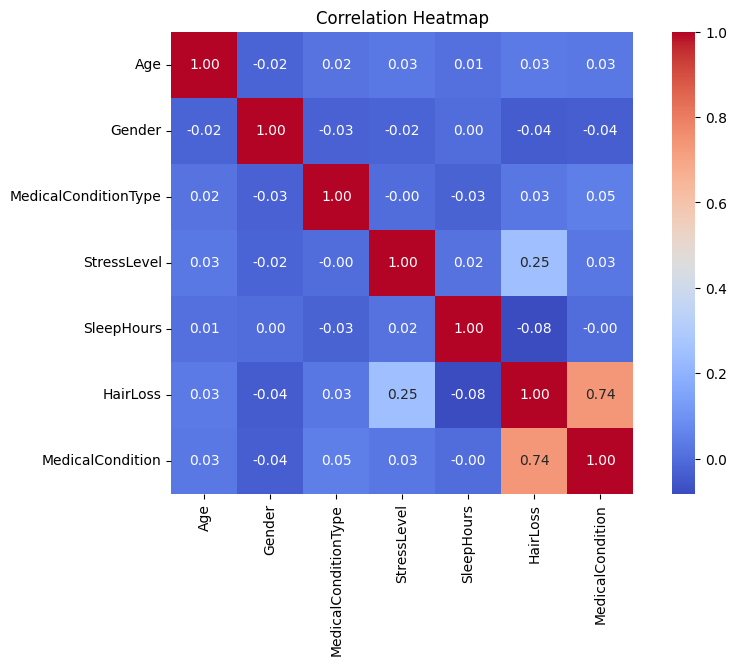

In [1074]:
# Make a copy of df2 for encoding
df2_encoded = df2.copy()

# Convert only object columns to numeric codes in the copy
for col in df2_encoded.columns:
    if df2_encoded[col].dtype == 'object':
        df2_encoded[col] = df2_encoded[col].astype('category').cat.codes

# Compute correlation matrix
corr = df2_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

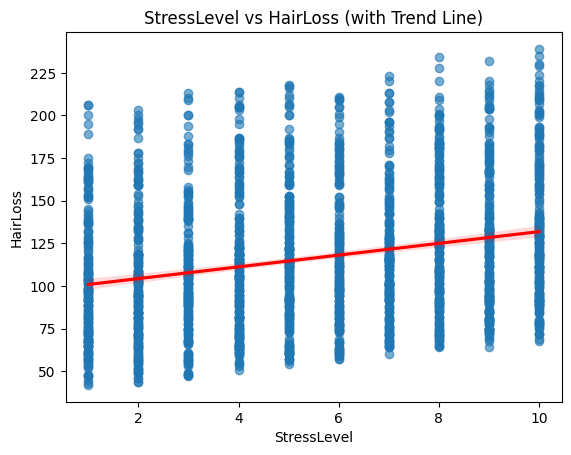

In [1076]:
sns.regplot(data=df2, x='StressLevel', y='HairLoss', scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
plt.title('StressLevel vs HairLoss (with Trend Line)')
plt.xlabel('StressLevel')
plt.ylabel('HairLoss')
plt.show()

In [ ]:
#for df2 in column HairLoss if value is between 0 to 111 then change it to 0 and if  value is more than 111 then change it to 1
df2['HairLoss'] = df2['HairLoss'].apply(lambda x: 0 if 0 <= x <= 111 else 1)

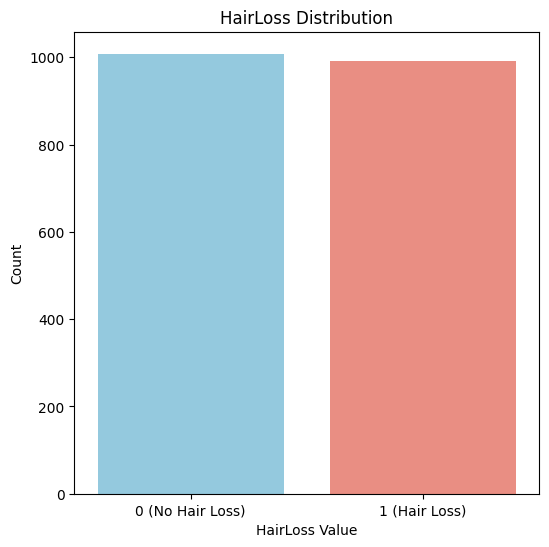

In [ ]:
hairloss_counts = df2['HairLoss'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
sns.barplot(x=hairloss_counts.index, y=hairloss_counts.values, palette=['skyblue', 'salmon'])
plt.title('HairLoss Distribution')
plt.xlabel('HairLoss Value')
plt.ylabel('Count')
plt.xticks([0, 1], ['0 (No Hair Loss)', '1 (Hair Loss)'])
plt.show()

In [ ]:
# # Group by StressLevel and compute mean HairLoss
# mean_hairloss_by_stress = df2.groupby('StressLevel')['HairLoss'].mean().reset_index()

# # Plot bar chart
# plt.figure(figsize=(8, 6))
# sns.barplot(data=mean_hairloss_by_stress, x='StressLevel', y='HairLoss')
# plt.title('Average Hair Loss by Stress Level in df2')
# plt.xlabel('Stress Level')
# plt.ylabel('Average Hair Loss')
# plt.show()

In [ ]:
# df3.head()

In [ ]:
# df3.describe()

In [ ]:
# # Clean column names (strip trailing spaces, etc.)
# df3.columns = df3.columns.str.strip()

# # Define columns to drop
# columns_to_drop = [
#     'Id',
#     'Medications & Treatments',
#     'Nutritional Deficiencies',
#     'Environmental Factors',
#     'Smoking',
#     'Weight Loss'
# ]

# # Drop only existing columns
# df3 = df3.drop(columns=[col for col in columns_to_drop if col in df3.columns])

# df3 = df3.rename(columns={
#     'Hormonal Changes': 'HormonalChanges',
#     'Medical Conditions': 'MedicalConditionType',
#     'Stress': 'StressLevel',
#     'Poor Hair Care Habits': 'PoorHairCare',
#     'Hair Loss': 'HairLoss',
# })

# df3['MedicalConditionType'] = df3['MedicalConditionType'].replace('No Data', 'Healthy')

# # Create the new 'MedicalCondition' column
# df3['MedicalCondition'] = df3['MedicalConditionType'].apply(lambda x: 'No' if x == 'Healthy' else 'Yes')

# # Preview the cleaned DataFrame
# df3.head()

In [ ]:
# plt.figure(figsize=(6, 4))
# sns.boxplot(x='StressLevel', y='HairLoss', data=df3)
# plt.title('Stress Level by Hair Fall')
# plt.show()

In [ ]:
# # Map categorical stress levels to numeric values
# stress_mapping = {
#     'Low': 3,
#     'Moderate': 6,
#     'High': 9
# }

# # Apply the mapping
# df3['StressLevel'] = df3['StressLevel'].map(stress_mapping)
# df3.head()

In [ ]:
# # Make a copy of df3 for encoding
# df3_encoded = df3.copy()

# # Convert only object columns to numeric codes in the copy
# for col in df3_encoded.columns:
#     if df3_encoded[col].dtype == 'object':
#         df3_encoded[col] = df3_encoded[col].astype('category').cat.codes

# # Compute correlation matrix
# corr = df3_encoded.corr()

# # Plot heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
# plt.title('Correlation Heatmap')
# plt.show()

In [ ]:
df4 = pd.read_csv(dataset_24KB)

In [ ]:
df4.head()

,Age,Gender,HairLoss,Genetics,MedicalCondition,PoorHairCare,MedicalConditionType,StressLevel,SleepHours
0,22,Male,1,Yes,Yes,No,Anemia,8,6.1
1,18,Male,0,No,No,Yes,Healthy,2,8.0
2,25,Male,1,Yes,Yes,No,Other,8,8.0
3,17,Male,0,No,Yes,No,Anemia,8,6.1
4,28,Male,0,Yes,Yes,No,Anemia,8,6.1


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 14 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Timestamp                                                                       716 non-null    object
 1   What is your name ?                                                             716 non-null    object
 2   What is your age ?                                                              716 non-null    int64 
 3   What is your gender ?                                                           716 non-null    object
 4   Do you have hair fall problem ?                                                 716 non-null    object
 5   Is there anyone in your family having a hair fall problem or a baldness issue?  716 non-null    object
 6   Did you face any type of c

In [ ]:
df4.describe()

,What is your age ?
count,716.000000
mean,24.121508
std,8.446825
min,15.000000
25%,21.000000
50%,24.000000
75%,27.000000
max,218.000000


In [ ]:
df4 = df4[df4['What is your age ?'] <= 100]

In [ ]:
# Clean column names (strip spaces and standardize)
df4.columns = df4.columns.str.strip()

# Define the columns to drop
columns_to_drop = [
    'Timestamp',
    'What is your name ?',
    'Do you think that in your area water is a reason behind hair fall problems?',
    'What is your food habit'
]

# Drop only the columns that exist in the DataFrame
df4 = df4.drop(columns=[col for col in columns_to_drop if col in df4.columns])
df4 = df4.rename(columns={
    'What is your age ?': 'Age',
    'What is your gender ?': 'Gender',
    'Do you have hair fall problem ?': 'HairLoss',
    'Is there anyone in your family having a hair fall problem or a baldness issue?': 'Genetics',
    'Did you face any type of chronic illness in the past?': 'MedicalCondition',
    'Do you use chemicals, hair gel, or color in your hair?': 'PoorHairCare',
    'Do you have anemia?': 'MedicalConditionType',
    'Do you have too much stress': 'StressLevel'
})

# Preview the cleaned DataFrame
# df4.head()

In [ ]:
# Create the new 'MedicalCondition' column
df4['MedicalConditionType'] = df4['MedicalConditionType'].apply(lambda x: 'Anemia' if x == 'Yes' else 'Healthy')

# Apply the conditional update
df4.loc[
    (df4['MedicalCondition'].str.lower() == 'yes') &
    (df4['MedicalConditionType'].str.lower() == 'healthy'),
    'MedicalConditionType'
] = 'Other'
df4.loc[
    (df4['MedicalCondition'].str.lower() == 'no') &
    (df4['MedicalConditionType'].str.lower() == 'anemia'),
    'MedicalCondition'
] = 'Yes'

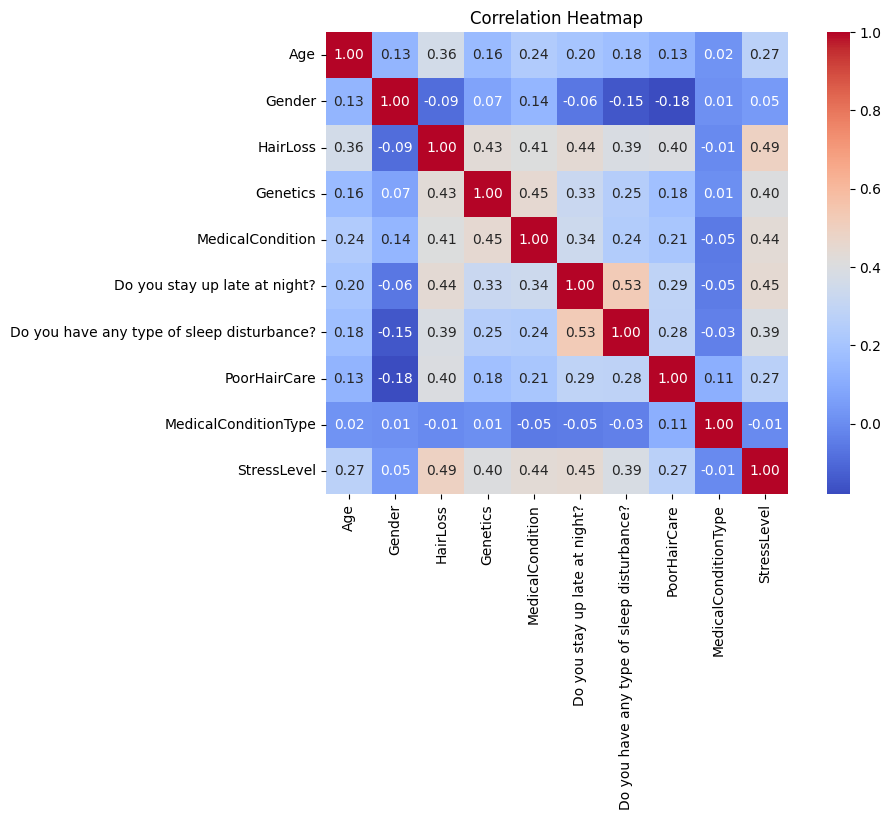

In [ ]:
# Make a copy of df4 for encoding
df_encoded = df4.copy()

# Convert only object columns to numeric codes in the copy
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Compute correlation matrix
corr = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# # Map sleep disturbance answers to numerical values
# sleep_disturbance_mapping = {
#     'Yes': 0,  # More disturbance, likely less sleep
#     'No': 1    # Less disturbance, likely more sleep
# }

# # Map staying up late answers to numerical values
# stay_up_late_mapping = {
#     'Yes': 0, # Stays up late, likely less sleep
#     'No': 1   # Doesn't stay up late, likely more sleep
# }

# # Apply the mappings
# df4['SleepDisturbance_Numeric'] = df4['Do you have any type of sleep disturbance?'].map(sleep_disturbance_mapping)
# df4['StayUpLate_Numeric'] = df4['Do you stay up late at night?'].map(stay_up_late_mapping)

# # Combine the numerical indicators. A simple sum can be used, higher values indicate better sleep habits.
# df4['SleepScore'] = df4['SleepDisturbance_Numeric'] + df4['StayUpLate_Numeric']

# # Define the target range for SleepHours
# min_hours = 5.1
# max_hours = 8.0

# # Scale the SleepScore to the desired SleepHours range
# # Normalize SleepScore to a 0-1 range first
# min_score = df4['SleepScore'].min()
# max_score = df4['SleepScore'].max()

# # Handle the case where min_score and max_score are the same (all values are identical)
# if max_score == min_score:
#     df4['SleepHours'] = (min_hours + max_hours) / 2 # Assign the middle value
# else:
#     df4['SleepScore_Normalized'] = (df4['SleepScore'] - min_score) / (max_score - min_score)

#     # Scale the normalized score to the target SleepHours range
#     df4['SleepHours'] = min_hours + df4['SleepScore_Normalized'] * (max_hours - min_hours)

# # Drop the original sleep columns and the intermediate numeric columns
# df4 = df4.drop(columns=[
#     'Do you stay up late at night?',
#     'Do you have any type of sleep disturbance?',
#     'SleepDisturbance_Numeric',
#     'StayUpLate_Numeric',
#     'SleepScore',
#     'SleepScore_Normalized' if 'SleepScore_Normalized' in df4.columns else None # Drop only if it exists
# ]).dropna(axis=1, how='all') # Remove the column entirely if it became all NaN after dropping

# # Display the first few rows with the new SleepHours column
# print(df4[['SleepHours']].head())

# # You can recompute and plot the correlation heatmap to see how the new SleepHours column correlates
# # Make a copy of df4 for encoding
# df_encoded_updated = df4.copy()

# # Convert only object columns to numeric codes in the copy
# for col in df_encoded_updated.columns:
#     if df_encoded_updated[col].dtype == 'object':
#         df_encoded_updated[col] = df_encoded_updated[col].astype('category').cat.codes

# # Compute correlation matrix
# corr_updated = df_encoded_updated.corr()

# # Plot heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(corr_updated, annot=True, cmap='coolwarm', fmt=".2f", square=True)
# plt.title('Updated Correlation Heatmap with SleepHours')
# plt.show()

In [ ]:
df4['Do you stay up late at night?'] = df4['Do you stay up late at night?'].str.strip().str.title()
df4['Do you have any type of sleep disturbance?'] = df4['Do you have any type of sleep disturbance?'].str.strip().str.title()

# Define the logic function for SleepHours
def calculate_sleep_hours(row):
    if row['Do you stay up late at night?'] == 'No' and row['Do you have any type of sleep disturbance?'] == 'No':
        return 8.0
    elif row['Do you stay up late at night?'] == 'No' and row['Do you have any type of sleep disturbance?'] == 'Yes':
        return 7.1
    elif row['Do you stay up late at night?'] == 'Yes' and row['Do you have any type of sleep disturbance?'] == 'No':
        return 6.1
    elif row['Do you stay up late at night?'] == 'Yes' and row['Do you have any type of sleep disturbance?'] == 'Yes':
        return 5.1
    else:
        return None

# Apply the logic and create the new column
df4['SleepHours'] = df4.apply(calculate_sleep_hours, axis=1)

In [ ]:
# Define columns to drop
columns_to_drop = [
    'Do you stay up late at night?',
    'Do you have any type of sleep disturbance?'
]

# Drop only existing columns
df4 = df4.drop(columns=[col for col in columns_to_drop if col in df4.columns])

df4.head()

,Age,Gender,HairLoss,Genetics,MedicalCondition,PoorHairCare,MedicalConditionType,StressLevel,SleepHours
0,22,Male,Yes,Yes,Yes,No,Anemia,Yes,6.1
1,18,Male,No,No,No,Yes,Healthy,No,8.0
2,25,Male,Yes,Yes,Yes,No,Other,Yes,8.0
3,17,Male,No,No,Yes,No,Anemia,Yes,6.1
4,28,Male,No,Yes,Yes,No,Anemia,Yes,6.1


In [ ]:
df4.head()

,Age,Gender,HairLoss,Genetics,MedicalCondition,PoorHairCare,MedicalConditionType,StressLevel,SleepHours
0,22,Male,Yes,Yes,Yes,No,Anemia,Yes,6.1
1,18,Male,No,No,No,Yes,Healthy,No,8.0
2,25,Male,Yes,Yes,Yes,No,Other,Yes,8.0
3,17,Male,No,No,Yes,No,Anemia,Yes,6.1
4,28,Male,No,Yes,Yes,No,Anemia,Yes,6.1


In [ ]:
# Strip whitespace and title-case all entries for consistency
df4['StressLevel'] = df4['StressLevel'].str.strip().str.title()

# Replace specific typo
df4['StressLevel'] = df4['StressLevel'].replace('\\No', 'No')

# Map 'StressLevel' before converting categorical columns
df4['StressLevel'] = df4['StressLevel'].map({'Yes': 8, 'No': 2}).astype(int)

df4.head()

,Age,Gender,HairLoss,Genetics,MedicalCondition,PoorHairCare,MedicalConditionType,StressLevel,SleepHours
0,22,Male,Yes,Yes,Yes,No,Anemia,8,6.1
1,18,Male,No,No,No,Yes,Healthy,2,8.0
2,25,Male,Yes,Yes,Yes,No,Other,8,8.0
3,17,Male,No,No,Yes,No,Anemia,8,6.1
4,28,Male,No,Yes,Yes,No,Anemia,8,6.1


In [ ]:
# HairLoss value from 'Yes' to 1 and 'No' to 0

df4['HairLoss'] = df4['HairLoss'].map({'Yes': 1, 'No': 0})
df4.head()

,Age,Gender,HairLoss,Genetics,MedicalCondition,PoorHairCare,MedicalConditionType,StressLevel,SleepHours
0,22,Male,1,Yes,Yes,No,Anemia,8,6.1
1,18,Male,0,No,No,Yes,Healthy,2,8.0
2,25,Male,1,Yes,Yes,No,Other,8,8.0
3,17,Male,0,No,Yes,No,Anemia,8,6.1
4,28,Male,0,Yes,Yes,No,Anemia,8,6.1


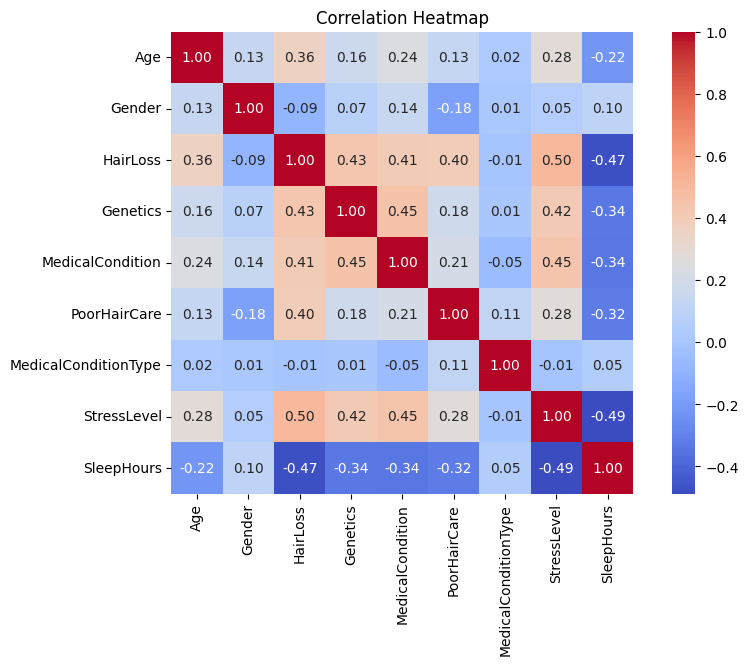

In [ ]:
# Make a copy of df4 for encoding
df_encoded = df4.copy()

# Convert only object columns to numeric codes in the copy
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Compute correlation matrix
corr = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


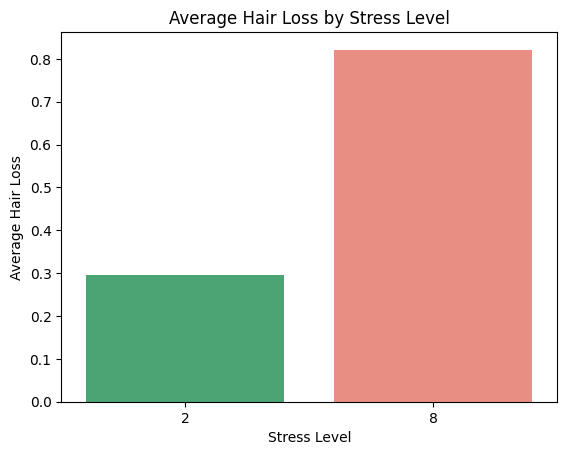

In [ ]:
df_barplot = df4.copy()

# Group by StressLevel and compute mean HairLoss
mean_values = df_barplot.groupby('StressLevel')['HairLoss'].mean().reset_index()

# Plot bar chart with two custom colors
sns.barplot(data=mean_values, x='StressLevel', y='HairLoss', palette=['mediumseagreen', 'salmon'])
plt.title('Average Hair Loss by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Average Hair Loss')
plt.show()

In [ ]:
# # Create a box plot to show the distribution of SleepHours for each HairLoss category
# plt.figure(figsize=(6, 6))
# sns.boxplot(data=df4, x='HairLoss', y='SleepHours')
# plt.title('Sleep Hours Distribution by Hair Loss')
# plt.xlabel('Hair Loss (0: No, 1: Yes)')
# plt.ylabel('Sleep Hours')
# plt.xticks([0, 1], ['No Hair Loss', 'Hair Loss'])
# plt.show()

In [ ]:
df2.head()

,Age,Gender,MedicalConditionType,StressLevel,SleepHours,HairLoss,MedicalCondition
0,56,Male,Healthy,2,7.0,0,No
1,40,Female,Thyroid,1,7.6,1,Yes
2,49,Male,Anemia,9,6.9,1,Yes
3,52,Female,Healthy,2,6.0,0,No
4,57,Male,Other,8,5.0,1,Yes


In [1055]:
# Identify common columns
common_cols = list(set(df2.columns) & set(df4.columns))

# Select only the common columns from each dataframe
df2_common = df2[common_cols]
df4_common = df4[common_cols]

# Concatenate the two dataframes vertically
merged_df = pd.concat([df2_common, df4_common], ignore_index=True)

merged_df.head()

,MedicalConditionType,Age,StressLevel,SleepHours,Gender,MedicalCondition,HairLoss
0,Healthy,56,2,7.0,Male,No,0
1,Thyroid,40,1,7.6,Female,Yes,1
2,Anemia,49,9,6.9,Male,Yes,1
3,Healthy,52,2,6.0,Female,No,0
4,Other,57,8,5.0,Male,Yes,1


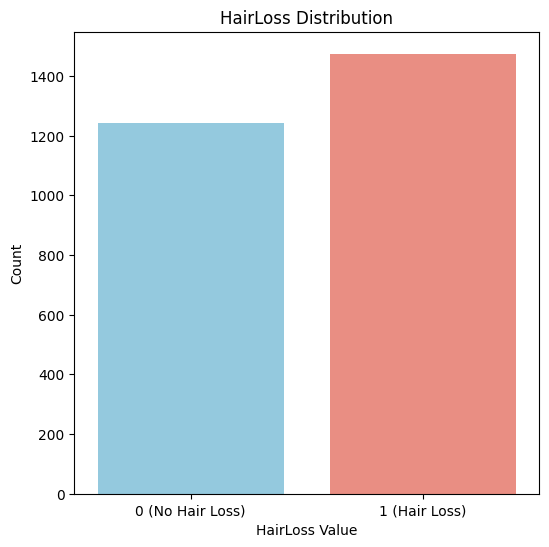

In [1068]:
hairloss_counts = merged_df['HairLoss'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
sns.barplot(x=hairloss_counts.index, y=hairloss_counts.values, palette=['skyblue', 'salmon'])
plt.title('HairLoss Distribution')
plt.xlabel('HairLoss Value')
plt.ylabel('Count')
plt.xticks([0, 1], ['0 (No Hair Loss)', '1 (Hair Loss)'])
plt.show()

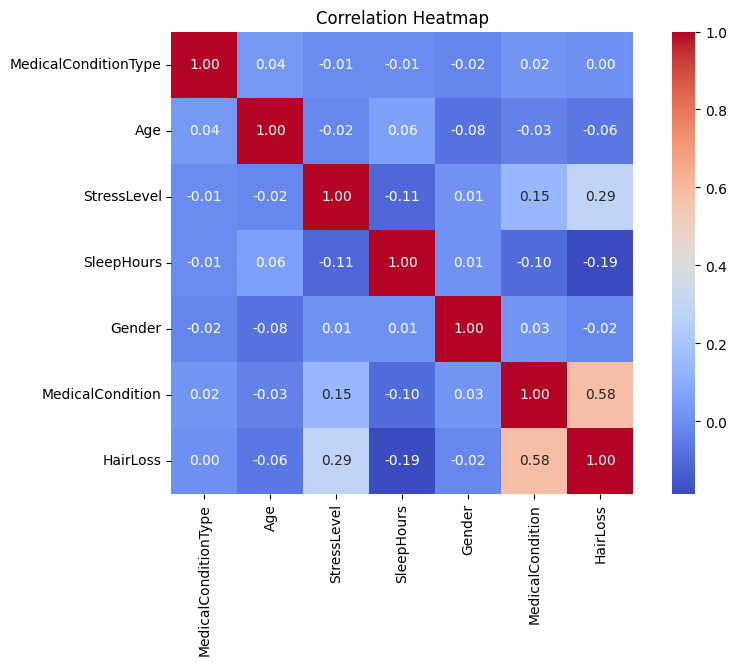

In [1056]:
# Make a copy of df4 for encoding
df_encoded = merged_df.copy()

# Convert only object columns to numeric codes in the copy
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Compute correlation matrix
corr = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# # For MedicalCondition, 'Yes' is 1 and 'No' is 0
# merged_df['MedicalCondition'] = merged_df['MedicalCondition'].map({'No': 0, 'Yes': 1})

# # Categorical (nominal): one-hot encoding
# merged_df = pd.get_dummies(merged_df, columns=['Gender'], drop_first=True)
# merged_df['Gender_Male'] = merged_df['Gender_Male'].astype(int)

# merged_df.head()

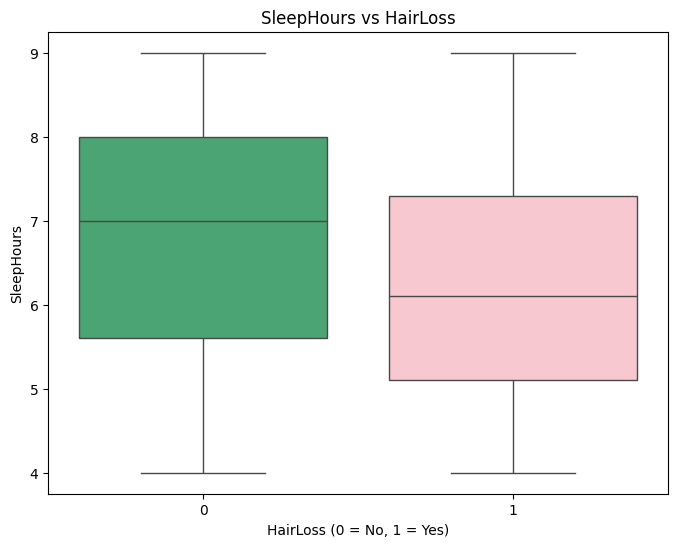

In [1057]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='HairLoss', y='SleepHours', data=merged_df, palette=['mediumseagreen', 'pink'])
plt.title('SleepHours vs HairLoss')
plt.xlabel('HairLoss (0 = No, 1 = Yes)')
plt.ylabel('SleepHours')
plt.show()


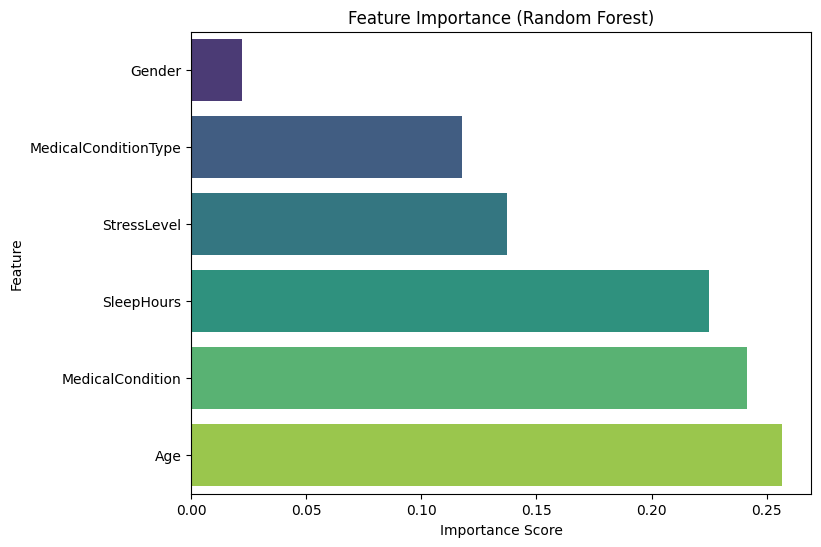

In [1058]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select features and target
features = ['Gender', 'MedicalConditionType', 'StressLevel', 'SleepHours', 'MedicalCondition', 'Age']
X = merged_df[features]
y = merged_df['HairLoss']

# Encode categorical features if needed
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Create a DataFrame of feature importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

<Figure size 600x600 with 0 Axes>

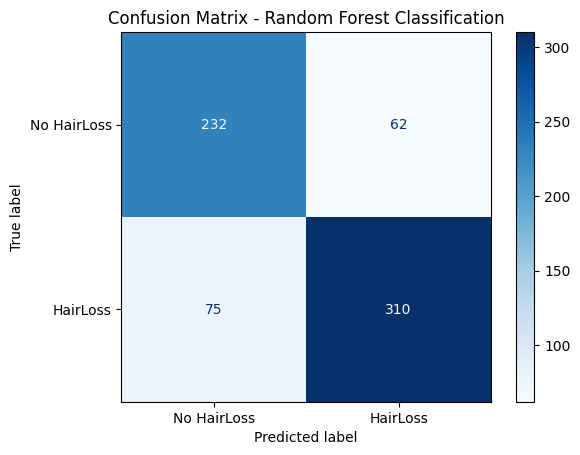

True Negatives: 232
False Positives: 62
False Negatives: 75
True Positives: 310


In [1059]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict and Confusion Matrix
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No HairLoss", "HairLoss"])

plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Random Forest Classification')
plt.grid(False)
plt.show()

# Extract confusion matrix values
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

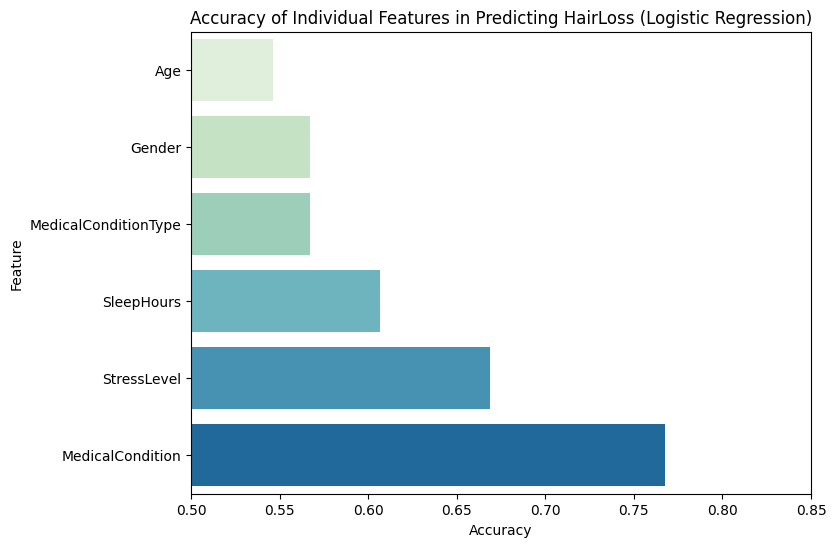

In [1060]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Gender', 'MedicalConditionType', 'StressLevel', 'SleepHours', 'MedicalCondition', 'Age']
X = merged_df[features]
y = merged_df['HairLoss']

# Encode categorical features if necessary
from sklearn.preprocessing import LabelEncoder
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Evaluate each feature individually
individual_accuracies = {}
for feature in features:
    X_feat = X[[feature]]
    X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_feat, y, random_state=42)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_f, y_train_f)
    y_pred = model.predict(X_test_f)

    acc = accuracy_score(y_test_f, y_pred)
    individual_accuracies[feature] = acc

# Convert to DataFrame
accuracy_df = pd.DataFrame.from_dict(individual_accuracies, orient='index', columns=['Accuracy'])
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=True).reset_index().rename(columns={'index': 'Feature'})

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=accuracy_df, x='Accuracy', y='Feature', palette='GnBu')
plt.title('Accuracy of Individual Features in Predicting HairLoss (Logistic Regression)')
plt.xlabel('Accuracy')
plt.ylabel('Feature')
plt.xlim(0.5, 0.85)
plt.show()


In [1067]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd


# Evaluate Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
rf_scores = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_rf)
]
lr_scores = [
    accuracy_score(y_test, y_pred_lr),
    precision_score(y_test, y_pred_lr),
    recall_score(y_test, y_pred_lr),
    f1_score(y_test, y_pred_lr)
]

# Determine Preferred Model
preferred = ['Random Forest' if rf > lr else 'Logistic Regression'
             for rf, lr in zip(rf_scores, lr_scores)]

# Build Comparison Table
comparison_df = pd.DataFrame({
    'Metric': metrics,
    'Random Forest': rf_scores,
    'Logistic Regression': lr_scores,
    'Preferred Model': preferred
})

# Display
print(comparison_df)

      Metric  Random Forest  Logistic Regression      Preferred Model
0   Accuracy       0.798233             0.790869        Random Forest
1  Precision       0.833333             0.858407  Logistic Regression
2     Recall       0.805195             0.755844        Random Forest
3   F1-score       0.819022             0.803867        Random Forest


In [ ]:
# # prompt: do standardization for merged_df

# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# # Separate features and target (assuming 'HairLoss' is your target)
# features = merged_df.drop('HairLoss', axis=1)
# target = merged_df['HairLoss']

# # Identify numerical columns
# numerical_cols = features.select_dtypes(include=['number']).columns

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit the scaler to the numerical features and transform them
# features[numerical_cols] = scaler.fit_transform(features[numerical_cols])

# # Now, 'features' contains the standardized numerical columns
# # You might want to re-combine with the target or keep them separate for modeling
# merged_df_standardized = pd.concat([features, target], axis=1)

# merged_df_standardized.head()


In [ ]:
# # Make a copy of df4 for encoding
# df_encoded = merged_df.copy()

# # Convert only object columns to numeric codes in the copy
# for col in df_encoded.columns:
#     if df_encoded[col].dtype == 'object':
#         df_encoded[col] = df_encoded[col].astype('category').cat.codes

# # Compute correlation matrix
# corr = df_encoded.corr()

# # Plot heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
# plt.title('Correlation Heatmap')
# plt.show()

In [ ]:
# merged_df = pd.get_dummies(merged_df, columns=['MedicalConditionType'], drop_first=False)
# merged_df['MedicalConditionType_Anemia'] = merged_df['MedicalConditionType_Anemia'].astype(int)
# merged_df['MedicalConditionType_Healthy'] = merged_df['MedicalConditionType_Healthy'].astype(int)
# merged_df['MedicalConditionType_Other'] = merged_df['MedicalConditionType_Other'].astype(int)
# merged_df['MedicalConditionType_Alopecia'] = merged_df['MedicalConditionType_Alopecia'].astype(int)
# merged_df['MedicalConditionType_Thyroid'] = merged_df['MedicalConditionType_Thyroid'].astype(int)

# merged_df.head()

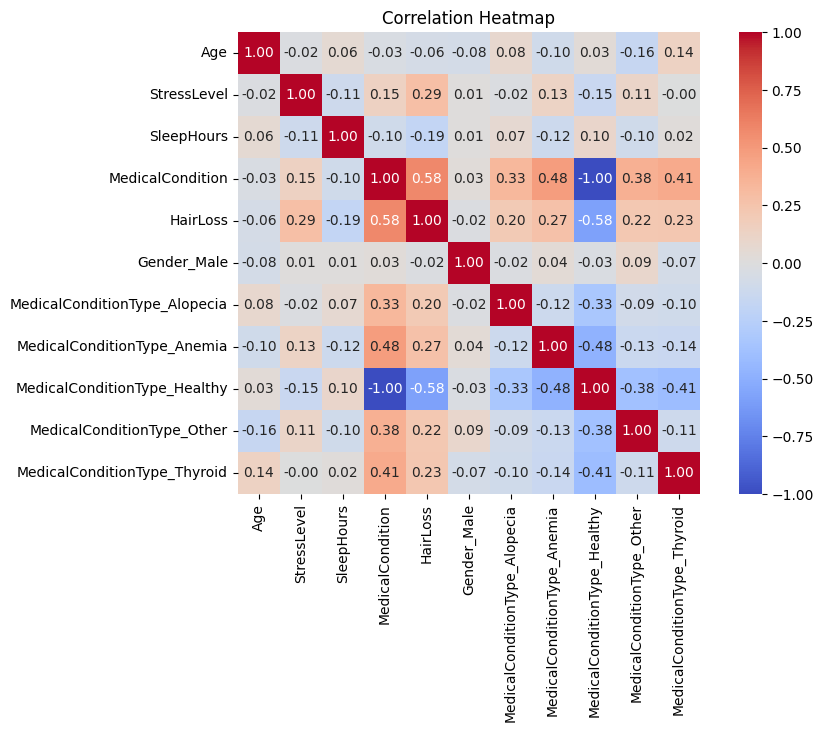

In [ ]:
# Make a copy of df4 for encoding
df_encoded = merged_df.copy()

# Convert only object columns to numeric codes in the copy
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Compute correlation matrix
corr = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# prompt: do standardization for merged_df

from sklearn.preprocessing import StandardScaler

# Select the numerical columns for standardization
numerical_cols = ['Age', 'StressLevel', 'SleepHours', 'HairLoss'] # Add other numerical columns if they exist

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler and transform the selected numerical columns
merged_df[numerical_cols] = scaler.fit_transform(merged_df[numerical_cols])

print("\nMerged DataFrame after Standardization:")
print(merged_df.head())


Merged DataFrame after Standardization:
        Age  StressLevel  SleepHours  MedicalCondition  HairLoss  Gender_Male  \
0  1.096035    -1.330741    0.377692                 0 -1.089840            1   
1  0.086520    -1.681718    0.810698                 1  0.917566            0   
2  0.654372     1.126101    0.305524                 1  0.917566            1   
3  0.843656    -1.330741   -0.343987                 0 -1.089840            0   
4  1.159130     0.775123   -1.065665                 1  0.917566            1   

   MedicalConditionType_Alopecia  MedicalConditionType_Anemia  \
0                              0                            0   
1                              0                            0   
2                              0                            1   
3                              0                            0   
4                              0                            0   

   MedicalConditionType_Healthy  MedicalConditionType_Other  \
0                 

In [ ]:
merged_df.head()

,Age,StressLevel,SleepHours,MedicalCondition,HairLoss,Gender_Male,MedicalConditionType_Alopecia,MedicalConditionType_Anemia,MedicalConditionType_Healthy,MedicalConditionType_Other,MedicalConditionType_Thyroid
0,1.096035,-1.330741,0.377692,0,-1.089840,1,0,0,1,0,0
1,0.086520,-1.681718,0.810698,1,0.917566,0,0,0,0,0,1
2,0.654372,1.126101,0.305524,1,0.917566,1,0,1,0,0,0
3,0.843656,-1.330741,-0.343987,0,-1.089840,0,0,0,1,0,0
4,1.159130,0.775123,-1.065665,1,0.917566,1,0,0,0,1,0
